In [11]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt

from sympy.solvers import solve
from sympy import Symbol
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
def sys(iv, dt, time,function,E,theta,eta,w,delta,alpha,s_0,b,rho):
    n = int(time/dt)
    t = np.linspace(0,time,n)
    x = np.array([[ i for i in iv]]*n)
    n_ord = len(iv)
    
    a = iv
    
    for i in range(1,n):
        X = function(a,E,theta,eta,w,delta,alpha,s_0,b,rho)
        #X[0] = X[0] + np.random.normal(0,0.1,1)
        a = a + np.array(X)*dt
        x[i] = a
    return np.array(x)


In [3]:
def function(x,E,theta,eta,w,delta,alpha,s_0,b,rho):

    lambda_ = alpha*(x[4]+s_0)**b
    
    
    A = x[2]*x[3]/w
    
    mu = 25
    dot_W = x[0]*rho*(mu/x[2]-1)
    dot_L = theta*(lambda_*(A-x[1])-A)
    
    #dot_L = theta*(lambda_*(E*lambda_-x[1])-E*lambda_ )
    
    dot_p = (x[2]* (1-x[3]) * dot_W / x[0] + eta*(w-x[0])*(E-A+x[1])+ w*dot_L ) / (1-x[3]*w-(1-x[3])*x[0])
    # / (1-x[3]*w-(1-x[3])*x[0])
    dot_n = x[3]* (-(1-w)*dot_p/x[2] + 1/A*(eta*(E-A+x[1])+dot_L))
    #dot_n = 0
    
    #dot_s = -delta*(x[4]) + delta * (np.log(1-dot_p/x[2]))**2
    #dot_s = -delta*(x[4]) + delta * (np.log(1-dot_p/x[2]))**2
    dot_s = -delta*(x[4]) + delta * (-dot_p/x[2])**2
    
    
    return([dot_W, dot_L, dot_p, dot_n, dot_s])
   


In [12]:
rho= 0.1
#rho = 100
E = 2

mu = 25
theta = 10
eta = 10
w = 0.5

delta = 0.5
alpha = 0.1
#alpha = 0.1

s_0 = 10**-6
b = -0.5

In [15]:
time = 100
dt = 10**-2


p0 = 15
L0 = 5
x= sys([0.30,L0,p0,0.8,0.01], dt,time,function,E,theta,eta,w,delta,alpha,s_0,b,rho)

n = int(time/dt)
t = np.linspace(0,time,n)

In [21]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)

ax5 = fig.add_subplot(5,1,4)
ax6 = fig.add_subplot(5,1,5)




lambda_ = alpha * (x[:,4] + s_0)**b
w = 0.5
A = x[:,2]*x[:,3]/w


ax1.plot(t,x[:,0], 'r-',label ='W')
ax1.set_ylabel('W')

ax2.plot(t,x[:,2], 'm-',label ='p')
#ax2.plot(t[1000:],w/x[:,3][1000:] * (E+x[:,1][1000:]), 'r-',alpha=0.4)
#ax2.plot(t,(lambda_-1)*2.27 + ((lambda_-1)*2.27 - A*(1-1/lambda_))*0.5, 'b--',linewidth=2,label ='L_slow-manifold')
#ax2.plot(t,(lambda_-1)*E, 'b--',linewidth=2,label ='L_slow-manifold',alpha=0.5)
#ax2.plot(t,(np.log(1-theta*(lambda_*(E*lambda_-x[:,1])-E*lambda_ ) / (w*((lambda_-1)*E-L0)+p0)))**2, 'm+-',linewidth=2,label ='L_slow-manifold',alpha=0.5)

ax3.plot(t,x[:,1], 'g-',label ='L',alpha=0.5)

#ax2.plot(t,(1-lambda_**-1)*A, 'g--',linewidth=2,label ='L_slow-manifold')
ax2.legend(loc=1)
ax2.set_ylabel('p')
ax3.set_ylabel('L')




#ax5.plot(t,x[:,4], 'c-',label ='s')
ax5.plot(t,lambda_, 'g-',label ='s')
#ax5.plot(t,(np.log(1-theta*lambda_*(E*(lambda_-1)-x[:,1]) / (x[:,1]+10)))**2, 'g--',label ='s')
ax5.set_ylabel('s')

ax6.plot(t,x[:,3], 'k-',label ='n')
ax6.plot(t,w/x[:,2] * (E+x[:,1]), 'r-',alpha=0.4)


a = np.linspace(10**-6,1,10000)

#ax2.plot(x[:,0][10000:], x[:,1][10000:],'g+-',alpha=0.7)
#ax2.plot(x[:,0], x[:,1],'g+-',alpha=0.7)
plt.grid()
plt.show()
print(np.min(x[:,2][200:]),np.max(x[:,2][200:]))

10.655574791771485 33.22206145999568


In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
T1 = 20000
T2 = 100000
m=25

A = x[:,2]*x[:,3] / w

#ax.plot(x[:,1][T1:T2], x[:,2][T1:T2]*x[:,3][T1:T2]/w,lambda_[T1:T2],".",markersize=0.7,alpha=0.8)
#ax.plot((1-1/lambda_[T1:T2])*x[:,3][T1:T2]*x[:,2][T1:T2]/w,    x[:,2][T1:T2]*x[:,3][T1:T2]/w,    lambda_[T1:T2],"r.",markersize=0.7,alpha=0.8)

#Complete dot(p)=0
#NN = (1-x[:,3])*rho*mu + eta*(w-x[:,0])*(E+x[:,1])-w*theta*lambda_*x[:,1]
#DD = (1-x[:,3])*rho + eta*(w-x[:,0])*x[:,3]/w-x[:,3]*theta*(lambda_-1)
#pp =  NN / DD
#ax.plot(x[:,1][T1:T2] , x[:,2][T1:T2] , lambda_[T1:T2],".-",markersize=0.7,alpha=0.8)
#ax.plot(x[:,1][T1:T2],    pp[T1:T2],    lambda_[T1:T2],"r.-",markersize=0.7,alpha=0.8,linewidth=0.1)
#ax.set_ylim3d(-100,400)

#Complete dot(A) =0
#NN = eta*(1-x[:,0])*(E+x[:,1])+x[:,3]*(1-x[:,3])*rho*(mu/x[:,2]-1)-(1-x[:,0]*(1-x[:,3]))*theta*lambda_*x[:,1] 
#NN = eta*(1-x[:,0])*(E+x[:,1])-(1-x[:,0]*(1-x[:,3]))*theta*lambda_*x[:,1] 
#DD = eta*(1-x[:,0])-(1-x[:,0]*(1-x[:,3]))*theta*(lambda_-1)
#AA = NN / DD

ax.plot(x[:,0][T1:T2], x[:,2][T1:T2]*x[:,3][T1:T2]/w,lambda_[T1:T2],".",markersize=0.7,alpha=0.8)
ax.plot(x[:,0][T1:T2], E+x[:,1][T1:T2],lambda_[T1:T2],".",markersize=0.5,alpha=0.5)
#ax.plot(x[:,0][T1:T2],    AA[T1:T2],    lambda_[T1:T2],".",markersize=0.2,alpha=0.5)

#ax.plot(x[:,2][T1:T2]*x[:,3][T1:T2]/w -2,    x[:,2][T1:T2]*x[:,3][T1:T2]/w,    lambda_[T1:T2],"g-.",markersize=0.7,alpha=0.8)

#pp = mu + eta*(0.5-x[:,0][T1:T2])*(E-A[T1:T2]+x[:,1][T1:T2])/(rho*(1-x[:,3][T1:T2])) + w*theta/rho * (lambda_[T1:T2]*(A[T1:T2]-x[:,1][T1:T2])-A[T1:T2])/(1-x[:,3][T1:T2])

#ax.plot(x[:,1][T1:T2], x[:,2][T1:T2],lambda_[T1:T2],".",markersize=0.7,alpha=0.8)
#ax.plot(x[:,1][T1:T2],pp,lambda_[T1:T2],"r-",markersize=0.7,alpha=0.4)


ax.set_xlabel('L')
ax.set_ylabel('A')
ax.set_zlabel('lambda')

plt.show()

In [8]:

def plot_implicit(fn,fn2, bbox=(0.2,25)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(-12, 25, 100) # resolution of the contour #L
    B = np.linspace(10,35, 100) # number of slices #n
     # grid on which the contour is plotted
    A1,A2 = np.meshgrid(A,A)


    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        for i in range(len(Z)):
            for j in range(len(Z[i])):
                if Z[i][j]<0.1:
                    Z[i][j]=0
                    
        cset = ax.contour(X, Y+y, Z, [y], zdir='y',linewidth=4,alpha=0.5)
    
    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn2(X,y,Z)
        
        for i in range(len(Z)):
            for j in range(len(Z[i])):
                if Z[i][j]<0.1:
                    Z[i][j]=0
                    
        #cset = ax.contour(X, Y+y, Z, [y], zdir='y',linewidth=4,alpha=0.5, colors=('c'))



    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    #ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(min(A), max(A))
    ax.set_ylim3d(min(B),max(B))
    ax.set_zlim3d( zmin, zmax)
    
    ax.set_xlabel('L')
    ax.set_ylabel('p')
    ax.set_zlabel('lambda_')

    plt.show()

C:\Users\kk\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


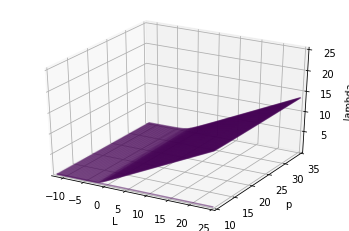

In [9]:
## A IS FAST

def df_surf(L,p,z):
    mu = 25
    rho= 0.1
    E = 2
    theta = 10
    w = 0.5
    delta = 0.5
    alpha = 0.1
    s0=10**-6
    
    n = w*(E+L)/p
    W = 0.54
    #return -(alpha/z)**2 + ( rho*(mu/p-1) - z*(E*w/p*rho*(mu/p-1)+w*theta*(L+E)/p) + z**2*(w*theta*E /p))**2
    return -alpha + z*((rho*(mu/p-1)*(1-n) + w *theta /p * (z*E-(E+L))) / (1-n*w-(1-n)*W))
    
    #return -z + ( rho*(mu/p-1) - alpha*z**(-0.5)*(E*w/p*rho*(mu/p-1)+w*theta*(L+E)/p) + (alpha**2/z) *(w*theta*E /p))**2

    
def df_surf2(L,p,z):
    mu = 25
    rho= 0.1
    E = 2
    theta = 10
    w = 0.5
    delta = 0.5
    alpha = 0.1
    s0=10**-6
    
    n = w*(E+L)/p
    W = 0.54
    #return -(alpha/z)**2 + ( rho*(mu/p-1) - z*(E*w/p*rho*(mu/p-1)+w*theta*(L+E)/p) + z**2*(w*theta*E /p))**2
    return +alpha + z*((rho*(mu/p-1)*(1-n) + w *theta /p * (z*E-(E+L))) / (1-n*w-(1-n)*W))
    #return -z + ( rho*(mu/p-1) - alpha*z**(-0.5)*(E*w/p*rho*(mu/p-1)+w*theta*(L+E)/p) + (alpha**2/z) *(w*theta*E /p))**2



plot_implicit(df_surf,df_surf2)

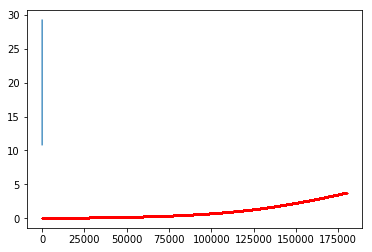

In [10]:

mu=25
#s = (alpha/lambda_[T1:T2])**2
plt.plot(x[:,1][T1:2*T2],x[:,2][T1:2*T2], lambda_[T1:2*T2],'r.',markersize=0.6,alpha=0.8)
#plt.plot(x[:,1][T1:T2], x[:,2][T1:T2],lambda_[T1:T2],'--',markersize=0.6)
#ax.plot(x[:,0][T1:T2]*0+0.2, x[:,2][T1:T2],alpha*w /( E*rho*(mu/x[:,2][T1:T2]-1)),'m--')

ax.set_xlabel('L')
ax.set_ylabel('p')
ax.set_zlabel('lambda')

plt.show()

In [48]:
print(len(x))
T1 = 10000
T2 = 20000

30000


In [49]:
def a0(x): 
    W,L,p,n,s = x
    return((rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))

def a1(x): 
    W,L,p,n,s = x
    return(w*theta /p *E / (1-n*w-(1-n)*W))

a00 = np.array([a0(i) for i in x[T1:T2]])
a11 = np.array([a1(i) for i in x[T1:T2]])

plt.figure()
plt.plot(t[T1:T2],a00**2 )
plt.plot(t[T1:T2],a11**2 )
plt.plot(t[T1:T2],a11*a00*2 )

plt.show()

In [89]:
s0=10**-6
T1 = 10000
T2 = 20000

lam = np.real([np.roots([(w*theta /p *E / (1-n*w-(1-n)*W))**2,2*(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))*(w*theta /p *E / (1-n*w-(1-n)*W)),(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))**2+s0,0,-alpha**2,0  ])[0] for W,L,p,n,s in x[T1:T2]])
lam2 = np.real([np.roots([(w*theta /p *E / (1-n*w-(1-n)*W))**2,2*(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))*(w*theta /p *E / (1-n*w-(1-n)*W)),(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))**2+s0,0,-alpha**2,0  ])[1] for W,L,p,n,s in x[T1:T2]])
lam3 = np.real([np.roots([(w*theta /p *E / (1-n*w-(1-n)*W))**2,2*(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))*(w*theta /p *E / (1-n*w-(1-n)*W)),(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))**2+s0,0,-alpha**2,0  ])[2] for W,L,p,n,s in x[T1:T2]])
lam4 = np.real([np.roots([(w*theta /p *E / (1-n*w-(1-n)*W))**2,2*(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))*(w*theta /p *E / (1-n*w-(1-n)*W)),(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))**2+s0,0,-alpha**2,0  ])[3] for W,L,p,n,s in x[T1:T2]])
lam5 = np.real([np.roots([(w*theta /p *E / (1-n*w-(1-n)*W))**2,2*(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))*(w*theta /p *E / (1-n*w-(1-n)*W)),(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))**2+s0,0,-alpha**2,0  ])[4] for W,L,p,n,s in x[T1:T2]])

lami = np.imag([np.roots([(w*theta /p *E / (1-n*w-(1-n)*W))**2,2*(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))*(w*theta /p *E / (1-n*w-(1-n)*W)),(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))**2+s0,0,-alpha**2,0  ])[0] for W,L,p,n,s in x[T1:T2]])
lam2i = np.imag([np.roots([(w*theta /p *E / (1-n*w-(1-n)*W))**2,2*(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))*(w*theta /p *E / (1-n*w-(1-n)*W)),(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))**2+s0,0,-alpha**2,0  ])[1] for W,L,p,n,s in x[T1:T2]])
lam3i = np.imag([np.roots([(w*theta /p *E / (1-n*w-(1-n)*W))**2,2*(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))*(w*theta /p *E / (1-n*w-(1-n)*W)),(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))**2+s0,0,-alpha**2,0  ])[2] for W,L,p,n,s in x[T1:T2]])
lam4i = np.imag([np.roots([(w*theta /p *E / (1-n*w-(1-n)*W))**2,2*(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))*(w*theta /p *E / (1-n*w-(1-n)*W)),(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))**2+s0,0,-alpha**2,0  ])[3] for W,L,p,n,s in x[T1:T2]])
lam5i = np.imag([np.roots([(w*theta /p *E / (1-n*w-(1-n)*W))**2,2*(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))*(w*theta /p *E / (1-n*w-(1-n)*W)),(( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W))**2+s0,0,-alpha**2,0  ])[4] for W,L,p,n,s in x[T1:T2]])


In [67]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(2,1,1)
# ax2 = fig.add_subplot(2,1,2)

ax1.plot(t[T1:T2],lambda_[T1:T2])

ax1.plot(t[T1:T2],lam,'.-',markersize=0.8,linewidth=0.2)
ax1.plot(t[T1:T2],lam2,'.-',markersize=0.8,linewidth=0.2)
ax1.plot(t[T1:T2],lam3,'.-',markersize=0.8,linewidth=0.2)
ax1.plot(t[T1:T2],lam4,'.-',markersize=0.8,linewidth=0.2)
ax1.plot(t[T1:T2],lam5,'.-',markersize=0.8,linewidth=0.2)

# ax2.plot(t[T1:T2],lami,'.-',markersize=0.8,linewidth=0.2)
# ax2.plot(t[T1:T2],lam2i,'.-',markersize=0.8,linewidth=0.2)
# ax2.plot(t[T1:T2],lam3i,'.-',markersize=0.8,linewidth=0.2)
# ax2.plot(t[T1:T2],lam4i,'.-',markersize=0.8,linewidth=0.2)
# ax2.plot(t[T1:T2],lam5i,'.-',markersize=0.8,linewidth=0.2)

plt.show()

In [183]:
lam3 = np.real([np.roots([(w *theta /p *(n*p/w -L)) / (1-n*w-(1-n)*W),( rho*(mu/p-1)*(1-n) + 1/p *eta*(w-W)*(E-n*p/w+L) -n*theta )/(1-n*w-(1-n)*W),alpha  ])[0] for W,L,p,n,s in x[T1:T2]])
lam2 = np.real([np.roots([(w *theta /p *(n*p/w -L)) / (1-n*w-(1-n)*W),( rho*(mu/p-1)*(1-n) + 1/p *eta*(w-W)*(E-n*p/w+L) -n*theta )/(1-n*w-(1-n)*W),alpha  ])[1] for W,L,p,n,s in x[T1:T2]])


    

In [184]:
plt.figure()
#plt.plot(x[:,1][T1:T2],lam)
plt.plot(x[:,1][T1:T2],alpha * (x[:,4][T1:T2] + s_0)**b,alpha=0.5)
plt.plot(x[:,1][T1:T2],lam,'g-')
plt.plot(x[:,1][T1:T2],lam3)
plt.plot(x[:,1][T1:T2],lam2)



plt.show()

In [90]:
def deriv_traj(Lx,l_lam):
    W = Lx[:,0]
    L = Lx[:,1]
    p = Lx[:,2]
    n = Lx[:,3]
    lambda_ = l_lam
    
    mu = 25
    rho= 0.1
    E = 2
    theta = 10
    w = 0.5
    delta = 0.5
    alpha = 0.1
    s0 = 10**-6
    
    a0 = ( rho*(mu/p-1)*(1-n) - w *theta /p *(E+L) ) / (1-n*w-(1-n)*W)
    a1 = w*theta /p *E / (1-n*w-(1-n)*W)
    
    df = alpha**2 - lambda_**2 * 3*(a0**2+s0) - 4*lambda_**3 * (2*a0*a1) - 5 *lambda_**4 * a1**2
    return delta*df

In [17]:

df0 = deriv_traj(x[T1:T2],lambda_[T1:T2])

l_lam = lam
df = deriv_traj(x[T1:T2],l_lam)

l_lam2 = lam2
df2 = deriv_traj(x[T1:T2],l_lam2)

l_lam3 = lam3
df3 = deriv_traj(x[T1:T2],l_lam3)

l_lam4 = lam4
df4 = deriv_traj(x[T1:T2],l_lam4)

NameError: name 'deriv_traj' is not defined

In [93]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

lambda_ = alpha * (x[:,4] + s_0)**b

ax1.plot(t[T1:T2],lambda_[T1:T2])
ax1.plot(t[T1:T2],lam,'.-',markersize=0.8,linewidth=0.2)
ax1.plot(t[T1:T2],lam2,'.-',markersize=0.8,linewidth=0.2)
ax1.plot(t[T1:T2],lam3,'.-',markersize=0.8,linewidth=0.2)
ax1.plot(t[T1:T2],lam4,'.-',markersize=0.8,linewidth=0.2)


ax2.plot(t[T1:T2],0*df, 'k--',label ='s',alpha=0.6)
ax2.plot(t[T1:T2],df, 'g-',label ='s')
ax2.plot(t[T1:T2],df2, 'c-',label ='s')
ax2.plot(t[T1:T2],df3, 'm-',label ='s')
ax2.plot(t[T1:T2],df4, 'm-',label ='s')

ax2.plot(t[T1:T2],df0, 'k.-',markersize=0.5,linewidth=0.3)


#ax2.set_ylim([-20,20])

In [187]:
def stability(Lx,lam):
    d = deriv_traj(Lx,lam)
    u = d.copy()
    s = d.copy()
    for i in range(len(d)):
        if np.sign(d[i])<0:
            s[i] = 1
            u[i] = np.nan
        elif np.sign(d[i])>0:
            u[i] = 1
            s[i] = np.nan
    return(s,u)
    

In [188]:
s1,u1 = stability(x[T1:T2],lam)
s2,u2 = stability(x[T1:T2],lam2)
s3,u3 = stability(x[T1:T2],lam3)

In [191]:

l_L = np.linspace(0,3,100)
l_lambda = np.linspace(0,2.4,100)

X,Y = np.meshgrid(l_L,l_lambda)
df = deriv_traj(X,Y)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax = fig.gca(projection='3d')
#surf = ax.plot_surface(X, Y, df, cmap=cm.bwr,linewidth=1, antialiased=False,alpha=0.6)
#surf = ax.plot_surface(X, Y, 0*df,cmap = cm.RdGy,linewidth=0, antialiased=False,alpha=0.5)
#surf = ax.plot_surface(X, Y, df, cmap=cm.bwr,linewidth=1, antialiased=False,alpha=0.6)


#fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('L')
ax.set_ylabel('n')
ax.set_zlabel('lamda_')
plt.plot(x[:,1][T1:T2],x[:,3][T1:T2],alpha * (x[:,4][T1:T2] + s_0)**b,'-',alpha=0.5,label ='Trajectory')
#plt.plot(x[:,1][T1:T2],lam,deriv_traj(x[:,1][T1:T2],lam),'c--',markersize=10,alpha=0.8)

ax.plot(x[:,1][T1:T2],x[:,3][T1:T2],lam*s1,'r-',label ='Attracting')
ax.plot(x[:,1][T1:T2],x[:,3][T1:T2],lam2*s2,'r-')
#ax.plot(x[:,1][T1:T2],x[:,3][T1:T2],lam3*s3,'r-') #strange
#ax.plot(x[:,1][T1:T2],x[:,3][T1:T2],lam*u1,'k-')
#ax.plot(x[:,1][T1:T2],x[:,3][T1:T2],lam2*u2,'k-')
ax.plot(x[:,1][T1:T2],x[:,3][T1:T2],lam3,'k-')

#ax.plot(x[:,1][T1:T2],lam3,'k-',label ='Repelling')
ax.legend()
plt.show()

C:\Users\kk\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  # Remove the CWD from sys.path while we load stuff.


In [432]:
print(T1,T2)

10000 12000


In [304]:
np.sign(-2)

-1

In [320]:
a = np.array([-1,0,2,5,6])
b = np.array([17.8,5,np.nan,8,9])
print(a*b)

[-17.8   0.    nan  40.   54. ]


In [321]:
plt.figure()
plt.plot(a,a*b)
plt.show()